# manage utils dir

In [1]:
print(__doc__)

# =========================================================================== #
# Imports
# =========================================================================== #

# Critical Imports
# --------------------------------------------------------------------------- #
import warnings; warnings.filterwarnings("ignore")

# Imports through 'from' syntax
# --------------------------------------------------------------------------- #
from itertools import islice;
from pprint import pprint;
from sklearn import preprocessing;

# Standard Imports
# --------------------------------------------------------------------------- #
import copy; import os;
import sys; import shutil;
import time;

# Imports through 'as' syntax
# --------------------------------------------------------------------------- #
import numpy as np; import pandas as pd;

# Imports for handling graphics
# --------------------------------------------------------------------------- #
%matplotlib inline
# Matplotlib pyplot provides plotting API
import matplotlib as mpl
from matplotlib import pyplot as plt
import chart_studio.plotly.plotly as py
import seaborn as sns; sns.set()

Automatically created module for IPython interactive environment


In [2]:
# Custom Imports
# --------------------------------------------------------------------------- #
from utils_stats.project_stats_utils import *
from utils_stats.fit_utils import *

None
None
None


In [3]:
# Set seed for code repeability
# --------------------------------------------------------------------------- #
np.random.seed(0)

## Fetch datasets

In [4]:
# GLOBAL VARS
# --------------------------------------------------------------------------- #
# ROOT_DIR_PATH = "C:\\Users\\Francesco\\Desktop" # "."
ROOT_DIR_PATH = ".."

In [5]:
resources_list = dir_traversal_by_os_walk(root_dir_path=ROOT_DIR_PATH, verbose=0)

In [6]:
df = get_df_from_list_of_os_walk(resources_list)
df.head(5)

,root,dirs,files,files size
0,..,,.gitignore,19
1,..,,Data Space Report (Official) - First Part Desc...,40694
2,..,,Data Space Report (Official) - N-Dimensional A...,255278
3,..,,Data Space Report (Official) - Two-Dimensional...,1027128
4,..,,Data Space Report (Official) - Two-Dimensional...,3252947


In [7]:
df_indexed = get_df_from_list_of_os_walk_numeric_indexed(resources_list=resources_list, columns="dirs,files".split(","))
assert df_indexed is not None, "df_indexed is None"

In [8]:
df_indexed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, .. to ..\__pycache__
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   dirs    149 non-null    int64
 1   files   149 non-null    int64
dtypes: int64(2)
memory usage: 3.5+ KB


In [9]:
df_indexed.head(5)

,dirs,files
..,9,12
..\.ipynb_checkpoints,0,11
..\figures,8,1
..\figures\.ipynb_checkpoints,0,0
..\figures\DecisionTreeClassifier,0,0


In [10]:
criteria = (df_indexed["dirs"] != 0) & (df_indexed["files"] != 0)
df_indexed[criteria]

,dirs,files
..,9,12
..\figures,8,1
..\models-analyses,6,3
..\models-analyses\cross_validation_analyses,1,4
..\models-analyses\descriptive_statistics_analyses,1,1
..\models-analyses\grid_search_analyses,1,2
..\models-analyses\official_notebooks_tmp,1,4
..\project_stats,4,4
..\project_stats\utils_stats,1,3
..\resources\scikit-learn-examples,1,2


In [11]:
df_indexed_v2 = get_df_from_list_of_os_walk_numeric_indexed_v2(resources_list=resources_list)
assert df_indexed_v2 is not None, "df_indexed_v2 is None"

In [12]:
df_indexed_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, .. to ..\__pycache__
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   dirs       149 non-null    int64
 1   dirs_size  149 non-null    int64
 2   files      149 non-null    int64
dtypes: int64(3)
memory usage: 4.7+ KB


In [13]:
df_indexed_v2.head(5)

,dirs,dirs_size,files
..,9,16137308,12
..\.ipynb_checkpoints,0,12102846,11
..\figures,8,97830,1
..\figures\.ipynb_checkpoints,0,0,0
..\figures\DecisionTreeClassifier,0,0,0


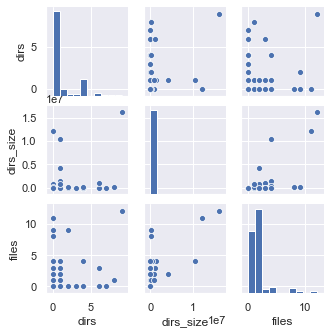

In [14]:
# sns.pairplot(df_indexed_v2, hue='???', size=1.5)
sns.pairplot(df_indexed_v2, height=1.5)

## Perform Machine Learning

In [15]:
criteria = (df_indexed_v2["dirs"] != 0) & (df_indexed_v2["files"] != 0)
# df_tmp = df_indexed[criteria]
df_tmp = df_indexed_v2

In [16]:
y = df_tmp["files"].values
X = df_tmp[["dirs", "dirs_size"]].values

In [17]:
# ax = sns.scatterplot(x="dirs", y="files", data=df_tmp)

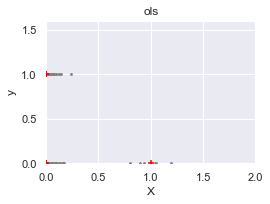

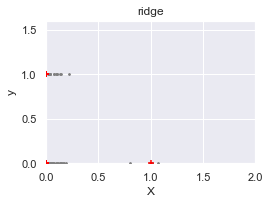

In [18]:
linear_regression_custom(X[:, 0], y, randomize_data=True)

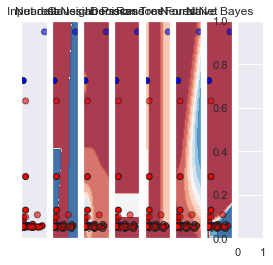

In [19]:
err_list = classifier_comparison(X, y, start_clf=0, stop_clf=10, verbose=0, record_errors=True)

In [20]:
pprint(err_list)

[('Linear SVM',
  ValueError('cannot reshape array of size 1106672 into shape (482,287)')),
 ('RBF SVM',
  ValueError('cannot reshape array of size 1106672 into shape (482,287)')),
 ('AdaBoost',
  ValueError('cannot reshape array of size 1106672 into shape (482,287)')),
 ('QDA',
  ValueError('y has only 1 sample in class 11, covariance is ill defined.'))]


## Show Some Graphs (Histograms & Pie Charts)

In [21]:
df = get_df_from_list_of_os_walk_numeric(resources_list=resources_list)
assert df is not None, "df is None"

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   root    149 non-null    object
 1   dirs    149 non-null    int64 
 2   files   149 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ KB


In [23]:
# print(df.head(df.shape[0]))
df.head(5)

,root,dirs,files
0,..,9,12
1,..\.ipynb_checkpoints,0,11
2,..\figures,8,1
3,..\figures\.ipynb_checkpoints,0,0
4,..\figures\DecisionTreeClassifier,0,0


In [24]:
df[["dirs", "files"]].agg(['sum', 'max', 'min', 'mean', 'std'])

,dirs,files
sum,148.000000,278.000000
max,9.000000,12.000000
min,0.000000,0.000000
mean,0.993289,1.865772
std,1.911900,2.129769


In [25]:
df[["dirs", "files"]].describe(include='all')

,dirs,files
count,149.000000,149.000000
mean,0.993289,1.865772
std,1.911900,2.129769
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,2.000000
75%,1.000000,2.000000
max,9.000000,12.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E500113E48>,
      dtype=object)

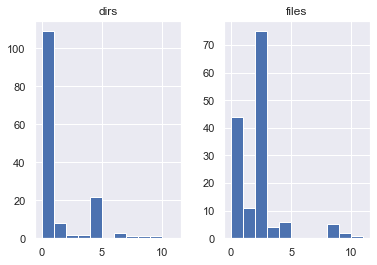

In [26]:
res_stats = df[["dirs", "files"]].describe(include='all')
loc_max: int = res_stats.index.get_loc('max')
loc_min: int = res_stats.index.get_loc('min')
max_val = int(max(res_stats.loc[res_stats.index[loc_max]]))
min_val = int(min(res_stats.loc[res_stats.index[loc_min]]))
bins = range(min_val, max_val)
df[["dirs", "files"]].hist(bins=bins)

In [27]:
type(res_stats.index)

pandas.core.indexes.base.Index

In [28]:
def file2ext(file_name: str) ->str:
    tmp_res: str = os.path.basename(file_name)
    filename, file_extension = os.path.splitext(tmp_res)
    if len(file_extension) == 0: return "-"
    return file_extension
df = get_df_from_list_of_os_walk(resources_list=resources_list, columns="root,dirs,files,files size", verbose=0)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   root        278 non-null    object
 1   dirs        278 non-null    object
 2   files       278 non-null    object
 3   files size  278 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 8.8+ KB


In [30]:
# type(df[["files"]].applymap(file2ext))
pd.unique(df[["files"]].applymap(file2ext)["files"].values)

array(['-', '.ipynb', '.png', '.jpg', '.py', '.pyc', '.json'],
      dtype=object)

In [31]:
# type(df[["files"]].applymap(file2ext)["files"].value_counts())
df[["files"]].applymap(file2ext)["files"].value_counts().to_frame().T

,.png,.py,.ipynb,.pyc,.json,.jpg,-
files,156,53,46,17,4,1,1


In [32]:
ext_df: pd.DataFrame = df[["files"]].applymap(file2ext)

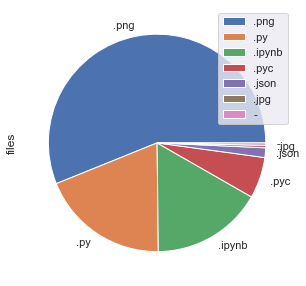

In [33]:
meta_data_img = {
    'title': 'Hist',
    'ylabel': 'Freq',
    'xlabel': 'Ext'
}
show_pie_by_variable_from_df(ext_df, variable_name="files", fig_name="pie_chart.png", meta_data_img=meta_data_img)

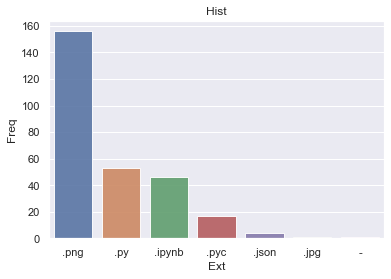

In [34]:
meta_data_img = {
    'title': 'Hist',
    'ylabel': 'Freq',
    'xlabel': 'Ext'
}
show_histogram_by_variable_from_df(ext_df, variable_name="files", fig_name="plain_hist.png", meta_data_img=meta_data_img)

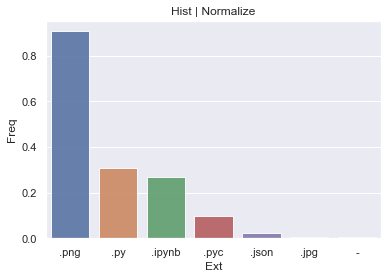

In [35]:
meta_data_img = {
    'title': f'Hist | Normalize',
    'ylabel': 'Freq',
    'xlabel': 'Ext'
}
show_histogram_by_variable_from_df(ext_df, variable_name="files", rescale_data_tech="Normalize", fig_name="pie_chart.png", meta_data_img=meta_data_img)

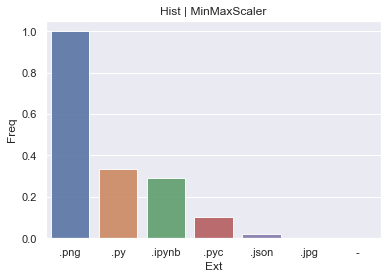

In [36]:
meta_data_img = {
    'title': 'Hist | MinMaxScaler',
    'ylabel': 'Freq',
    'xlabel': 'Ext'
}
show_histogram_by_variable_from_df(ext_df, variable_name="files", rescale_data_tech="MinMaxScaler", fig_name="pie_chart.png", meta_data_img=meta_data_img)

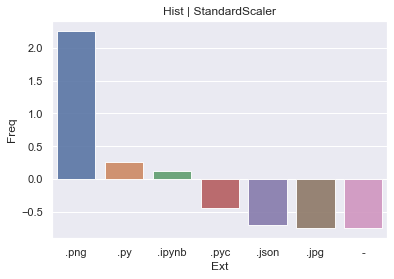

In [37]:
meta_data_img = {
    'title': 'Hist | StandardScaler',
    'ylabel': 'Freq',
    'xlabel': 'Ext'
}
show_histogram_by_variable_from_df(ext_df, variable_name="files", rescale_data_tech="StandardScaler", fig_name="pie_chart.png", meta_data_img=meta_data_img)

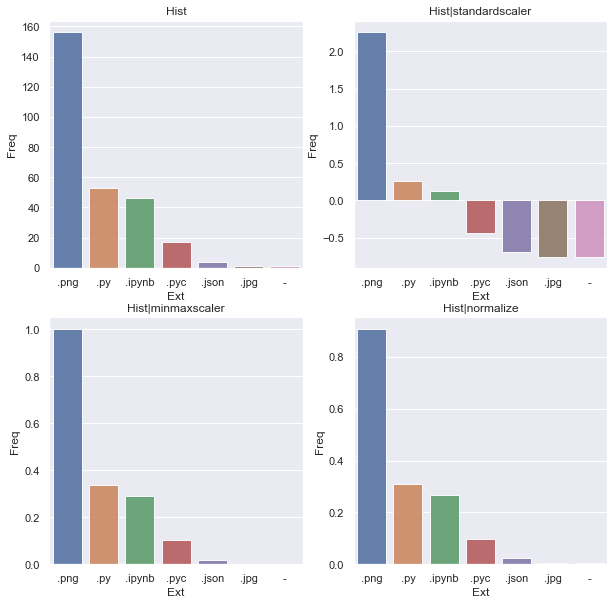

In [38]:
show_histograms_by_scaler_tech(
    ext_df, variable_name="files",
    # rescale_data_techs=["StandardScaler", "MinMaxScaler",], fig_name="all_hists_chart.png")
    rescale_data_techs=["StandardScaler", "MinMaxScaler", "Normalize"],
    figsize=(10, 10),
    fig_name="all_hists_chart.png",
    show_default=True)

## References:

## Scikit-Learn:

### Objects:
- (StandardScaler) https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

### Examples:
Some useful examples:
- (Ordinary Least Squares and Ridge Regression Variance) https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html#sphx-glr-auto-examples-linear-model-plot-ols-ridge-variance-py
- (Classifier comparison) https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

